In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

home_dir = '/users/cusgadmin'

# Make sure that caffe is on the python path:
caffe_root = '%s/caffe/' % home_dir  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_FILE = '%s/caffe/models/bvlc_reference_caffenet/deploy.prototxt' % home_dir
PRETRAINED = '%s/caffe/models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel' % home_dir

import os
if not os.path.isfile(PRETRAINED):
    print("Downloading pre-trained CaffeNet model...")
    !~/caffe/scripts/download_model_binary.py ~/caffe/models/bvlc_reference_caffenet

In [5]:
caffe.set_mode_cpu()
mean_image = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
print mean_image.shape
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=mean_image.mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

(3, 256, 256)


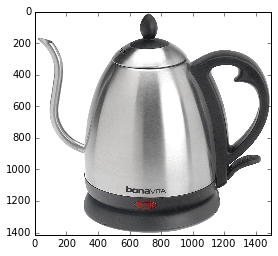

In [35]:
IMAGE_FILE = 'images/kettle.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

In [30]:
! $HOME/caffe/data/ilsvrc12/get_ilsvrc_aux.sh

Downloading...
--2015-04-27 14:42:58--  http://dl.caffe.berkeleyvision.org/caffe_ilsvrc12.tar.gz
Resolving dl.caffe.berkeleyvision.org... 169.229.222.251
Connecting to dl.caffe.berkeleyvision.org|169.229.222.251|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17858008 (17M) [application/octet-stream]
Saving to: 'caffe_ilsvrc12.tar.gz'

caffe_ilsvrc12.tar. 100%[=====================>]  17.03M  7.02MB/s   in 2.4s   

2015-04-27 14:43:01 (7.02 MB/s) - 'caffe_ilsvrc12.tar.gz' saved [17858008/17858008]

Unzipping...
Done.


In [33]:
import pandas as pd
with open('%s/data/ilsvrc12/synset_words.txt' % caffe_root) as f:
    labels_df = pd.DataFrame([
        {
            'synset_id': l.strip().split(' ')[0],
            'name': ' '.join(l.strip().split(' ')[1:]).split(',')[0]
        }
        for l in f.readlines()
    ])
labels_df.sort('synset_id')
print labels_df

                         name  synset_id
0                       tench  n01440764
1                    goldfish  n01443537
2           great white shark  n01484850
3                 tiger shark  n01491361
4                  hammerhead  n01494475
5                electric ray  n01496331
6                    stingray  n01498041
7                        cock  n01514668
8                         hen  n01514859
9                     ostrich  n01518878
10                  brambling  n01530575
11                  goldfinch  n01531178
12                house finch  n01532829
13                      junco  n01534433
14             indigo bunting  n01537544
15                      robin  n01558993
16                     bulbul  n01560419
17                        jay  n01580077
18                     magpie  n01582220
19                  chickadee  n01592084
20                water ouzel  n01601694
21                       kite  n01608432
22                 bald eagle  n01614925
23              

prediction shape: (1000,)
predicted class: 899
water jug


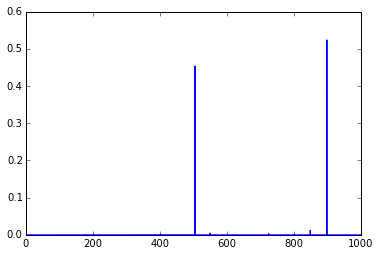

In [36]:
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
print 'prediction shape:', prediction[0].shape
plt.plot(prediction[0])
predicted_idx = prediction[0].argmax()
print 'predicted class:', predicted_idx
print labels_df['name'][predicted_idx]

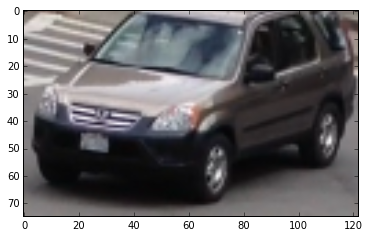

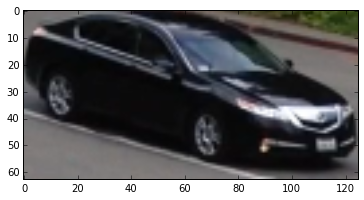

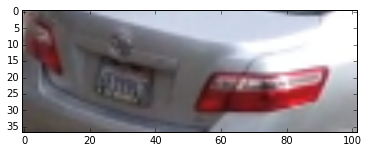

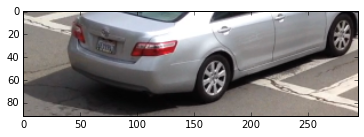

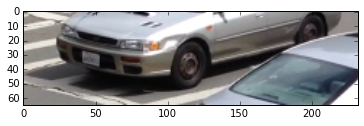

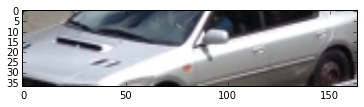

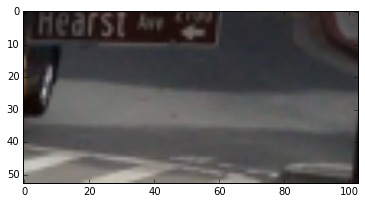

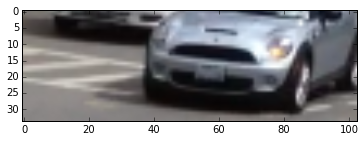

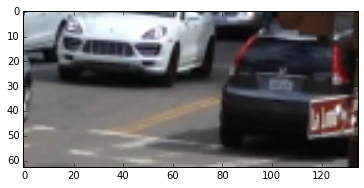

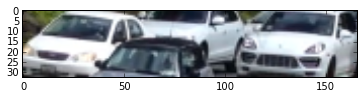

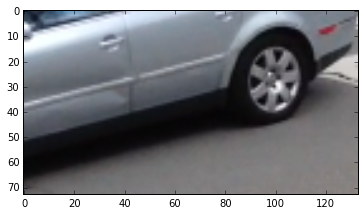

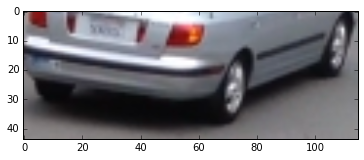

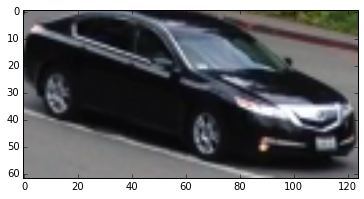

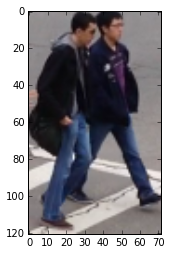

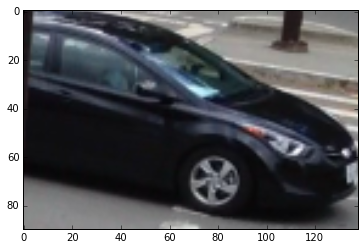

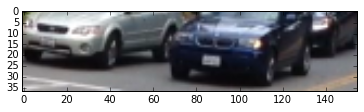

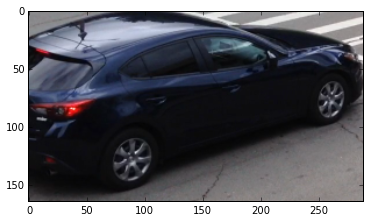

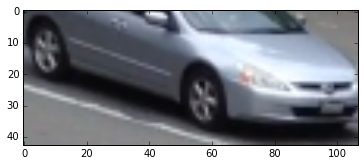

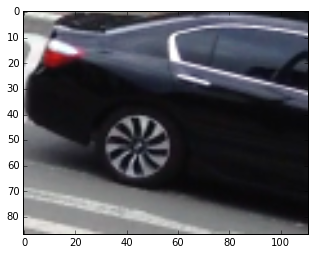

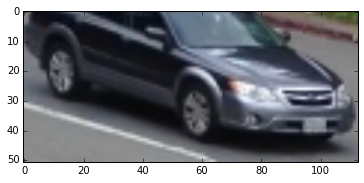

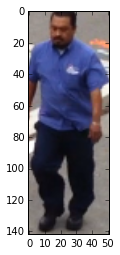

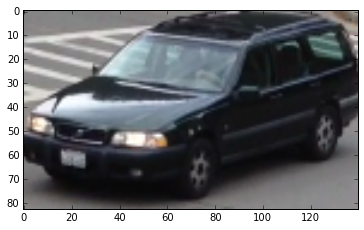

In [64]:
import os
import cv2

#
#   Run sementation.bounding_boxes.py prior to running this script
#
bbx_folder = '../region_proposals/'

file_list = os.listdir(bbx_folder)

image_list = [caffe.io.load_image(bbx_folder + x) for x in file_list]

for image in image_list:
    plt.imshow(image)
    plt.show()

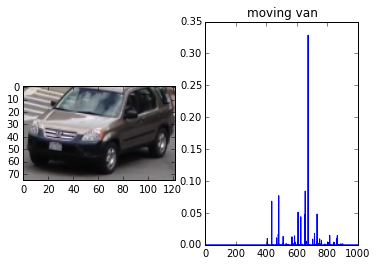

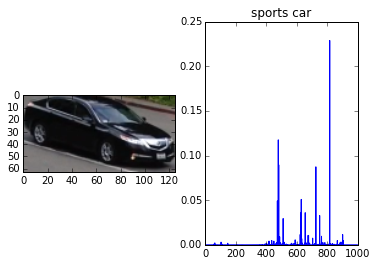

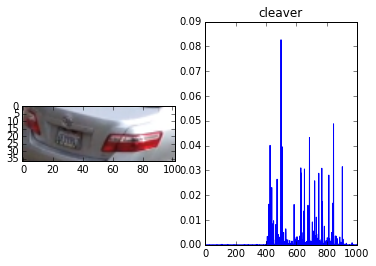

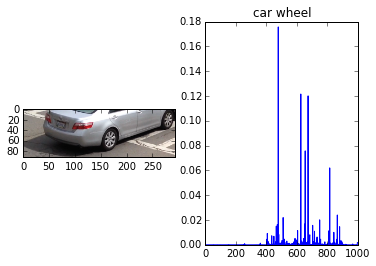

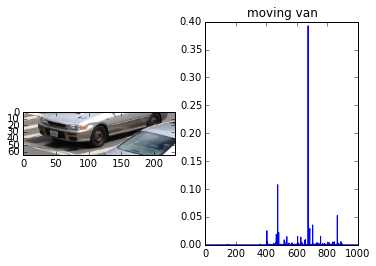

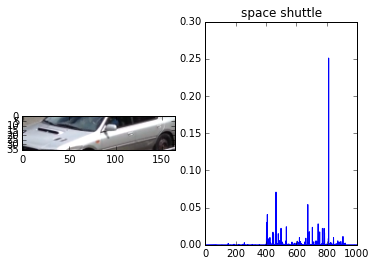

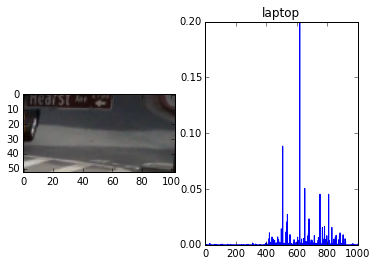

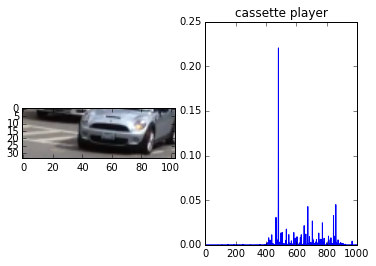

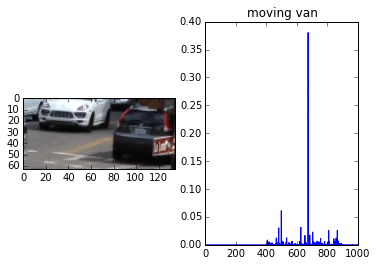

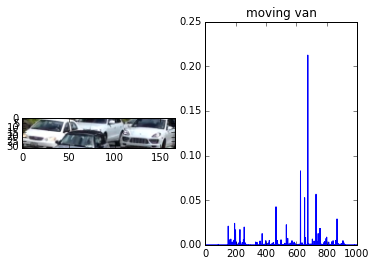

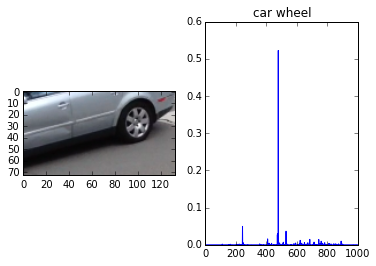

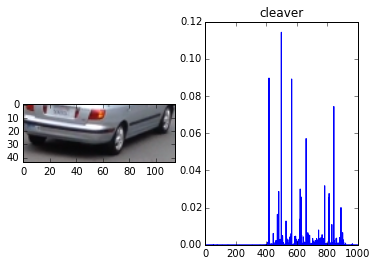

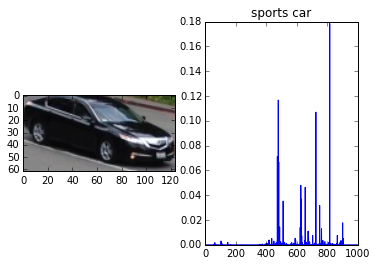

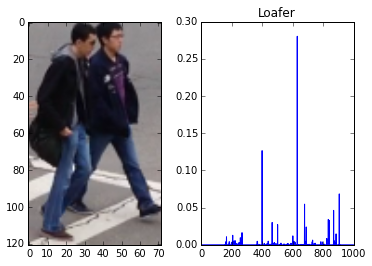

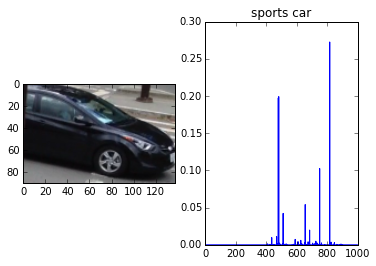

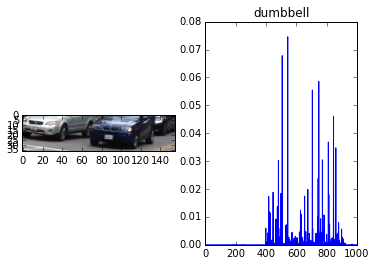

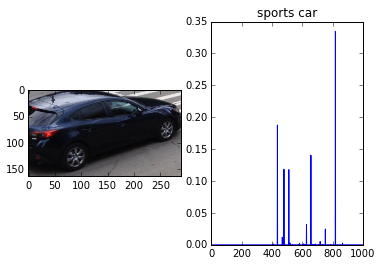

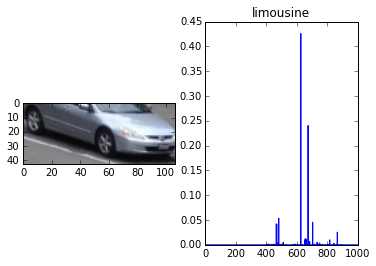

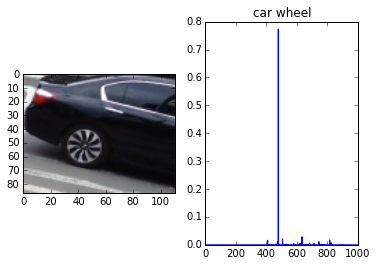

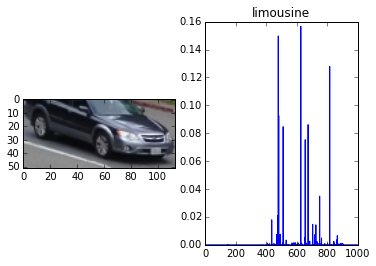

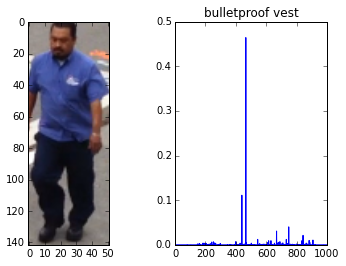

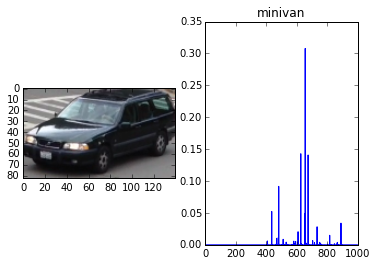

In [65]:
prediction = net.predict(image_list)  # predict takes any number of images, and formats them for the Caffe net automatically
for i in range(len(prediction)):
    predicted_idx   = prediction[i].argmax()
    predicted_class = labels_df['name'][predicted_idx]
    plt.subplot(121)
    plt.imshow(image_list[i])
    plt.subplot(122)
    plt.plot(prediction[i])
    plt.title(predicted_class)
    plt.show()
    